# Matplotlib
* lib -> 라이브러리 
* 시각화 할 때 가장 많이 사용하는 라이브러리 
* 2D 형태로 그래프, 이미지 등을 그릴 때 사용 
* 실제 과학 컴퓨팅 연구 분야나 인공지능 연구 분야에서도 많이 활용
* https://matplotlib.org/
* 💫💫 list 형태만 사용 가능

In [1]:
import matplotlib.pyplot as plt

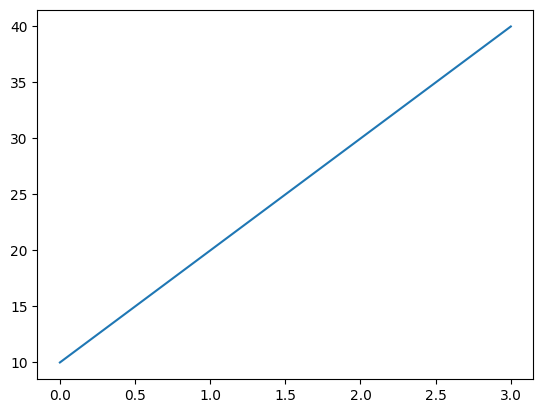

'\n1차원 데이터여도 그래프가 나오는 건\n list의 index와 mapping 되어 나오기 때문 \n'

In [2]:
plt.plot([10, 20, 30, 40])
plt.show()
'''
1차원 데이터여도 그래프가 나오는 건
 list의 index와 mapping 되어 나오기 때문 
'''

##### x축 정보 주기 
[x축 값 list], [y축 값 list]

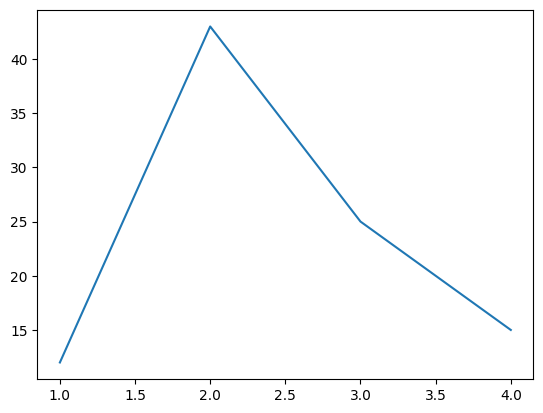

In [4]:
plt.plot([1, 2, 3, 4], [12, 43, 25, 15])
plt.show()

##### legend()
* 범례
* 해당 색상이 어떤  걸 가리키는지 표시 
* 기본은 최적 위치에 나오도록 하는 것

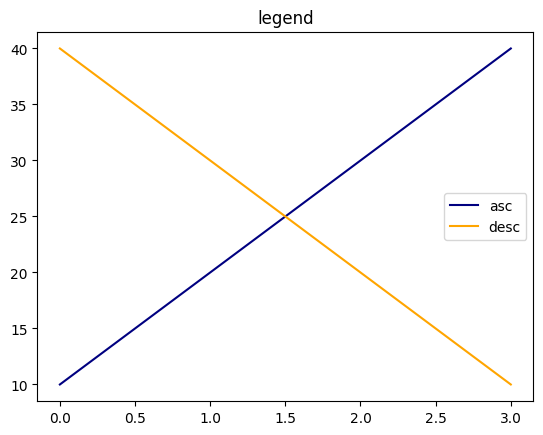

In [7]:
plt.title('legend')
plt.plot([10, 20, 30, 40], label='asc', color='navy')
plt.plot([40, 30, 20, 10], label='desc', color='orange')
plt.legend()
plt.show()

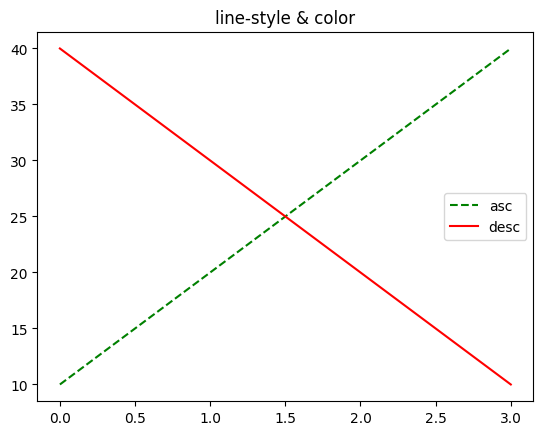

In [9]:
plt.title('line-style & color')
plt.plot([10, 20, 30, 40], label='asc', color='g', linestyle= '--')
plt.plot([40, 30, 20, 10], label='desc', color='r')
plt.legend()
plt.show()

##### 기온 분석 
* https://data.kma.go.kr/stcs/grnd/grndTaList.do?pgmNo=70
* site
    * 기본 통계 분석 
    * 통계 분석 > 기온 분석 
* data
    * 자료 구분: 일
    * 자료 형태: 기본
    * 기간: 19040101~20231116
    * 지역/지점: 서울 
* 검색 click 후 csv click


In [12]:
# pandas 사용하지 않고 csv file 읽기 
import csv 
f = open('data\seoul.csv', 'r')
data = csv.reader(f, delimiter=',')
cnt = 0
for row in data:
    print(row)
    cnt += 1
    if cnt == 10:
        break
f.close()

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
['\t1907-10-01', '108', '13.5', '7.9', '20.7']
['\t1907-10-02', '108', '16.2', '7.9', '22']
['\t1907-10-03', '108', '16.2', '13.1', '21.3']
['\t1907-10-04', '108', '16.5', '11.2', '22']
['\t1907-10-05', '108', '17.6', '10.9', '25.4']
['\t1907-10-06', '108', '13', '11.2', '21.3']
['\t1907-10-07', '108', '11.3', '6.3', '16.1']
['\t1907-10-08', '108', '8.9', '3.9', '14.9']
['\t1907-10-09', '108', '11.6', '3.8', '21.1']


##### 분석 내용
1. 서울이 가장 더웠던 날 
2. 얼마나 더웠는가 
* next() : 다음 

In [14]:
f = open('data\seoul.csv', 'r')
data = csv.reader(f, delimiter=',')
header = next(data)
for row in data: 
    # data 중에 가장 마지막 값 == 최고 기온 
    # float -> 위 데이터 출력 결과를 보면 문자열임 float으로 형 변환 
    # error 발생 : ValueError: could not convert string to float: ''
    row[-1] = float(row[-1])
    print(row)
f.close()

['\t1907-10-01', '108', '13.5', '7.9', 20.7]
['\t1907-10-02', '108', '16.2', '7.9', 22.0]
['\t1907-10-03', '108', '16.2', '13.1', 21.3]
['\t1907-10-04', '108', '16.5', '11.2', 22.0]
['\t1907-10-05', '108', '17.6', '10.9', 25.4]
['\t1907-10-06', '108', '13', '11.2', 21.3]
['\t1907-10-07', '108', '11.3', '6.3', 16.1]
['\t1907-10-08', '108', '8.9', '3.9', 14.9]
['\t1907-10-09', '108', '11.6', '3.8', 21.1]
['\t1907-10-10', '108', '14.2', '6.4', 24.1]
['\t1907-10-11', '108', '15.4', '10.1', 20.4]
['\t1907-10-12', '108', '13.9', '11.1', 17.4]
['\t1907-10-13', '108', '13.8', '8.3', 21.3]
['\t1907-10-14', '108', '13', '6.1', 20.6]
['\t1907-10-15', '108', '13.1', '5.7', 20.9]
['\t1907-10-16', '108', '14.1', '8.2', 20.2]
['\t1907-10-17', '108', '16.4', '10.3', 21.6]
['\t1907-10-18', '108', '14.3', '9.8', 20.9]
['\t1907-10-19', '108', '13.9', '6.7', 21.3]
['\t1907-10-20', '108', '18.3', '12.4', 22.7]
['\t1907-10-21', '108', '15.2', '10.7', 19.9]
['\t1907-10-22', '108', '15.4', '12.1', 19.6]
['\t1

ValueError: could not convert string to float: ''

##### error 발생 이유 
* csv file을 확인해보면 1950-08-31까지는 잘 나오고 있지만 그 뒤의 값들은 데이터가 없는 걸 확인할 수 있음 
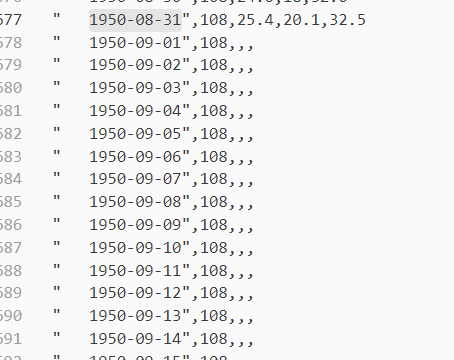
* 해결 방법 
1. 데이터가 없는 부분을 다른 값으로 대치 
2. 의미 없는 값으로 대치 ✔️✔️
3. 뛰어넘음 

###### 위와 같은 코드에서 에러가 나면 난다고 적고 수정 코드를 적고, 안 난다면 안 난다고 적으시오

In [18]:
import csv
max_data = ''
max_temp = -999
f = open('data\seoul.csv', 'r')
data = csv.reader(f)
header = next(data)
for row in data: 
    if row[-1] == '':
        row[-1] = -999
    row[-1] = float(row[-1])
    if max_temp < row[-1]:
        max_data = row[0]
        max_temp = row[-1]
f.close()
print("서울 최고 기온 날짜: "+max_data+", 최고 기온: "+max_temp)

TypeError: can only concatenate str (not "float") to str

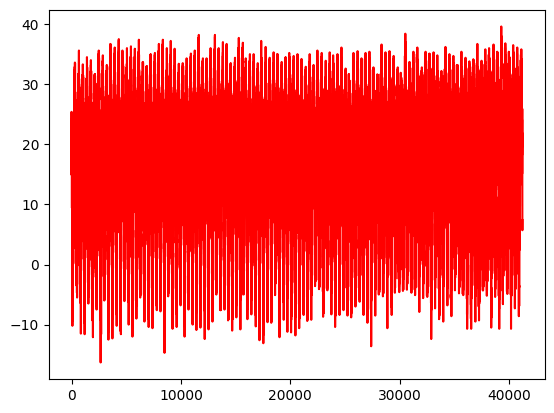

In [24]:
import csv
import matplotlib.pyplot as plt
f = open('data\seoul.csv', 'r')
data = csv.reader(f)
next(data)
result = []
for row in data:
    if row[-1] != '':
        result.append(float(row[-1]))
plt.plot(result, 'r')
plt.show()
f.close()